In [9]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# The Merged dataset was imported into the Jupiter Notebook


FILENAME = 'MergedDataset.csv'

data = pd.read_csv(FILENAME)
data = data.drop(columns = ['InChI_Key', 
                        'species', 'SLN','MolWt','ExactMolWt',
                        'SMILES','UnLogged_LogS','UnLoggedKh_first','MaxAbsEStateIndex','MinAbsEStateIndex'], axis=1)


data = data.rename(columns={'Kh_first': 'LogKh'})
data = data.rename(columns={'SMILES': 'Smiles'})

data




,LogS,MW,MLOGP,LogKh,MaxEStateIndex,MinEStateIndex,qed,HeavyAtomMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-4.100,241.41,2.893,-6.709304,4.303889,0.309265,0.770836,222.212,90,0,...,1,0,0,0,0,0,0,0,0,0
1,-4.230,100.23,3.869,12.129112,2.298611,0.583333,0.500244,84.077,44,0,...,0,0,0,0,0,0,0,0,0,0
2,-3.740,86.20,3.516,12.040558,2.253472,0.898148,0.483890,72.066,38,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.280,107.17,1.859,0.139262,3.026944,1.159722,0.575903,98.084,42,0,...,0,0,0,0,0,0,0,0,0,0
4,-5.510,140.30,4.678,12.507178,3.694652,1.200521,0.371151,120.110,60,0,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,-3.010,144.29,3.503,2.207275,8.468955,0.368827,0.544619,124.098,62,0,...,0,0,0,0,0,0,0,0,5,0
878,-6.168,389.30,4.214,0.733969,6.650023,-1.503302,0.440550,384.280,100,0,...,0,0,0,0,0,0,0,0,0,0
879,-3.180,96.19,2.420,8.254829,2.298611,1.319444,0.406338,84.077,40,0,...,0,0,0,0,0,0,0,0,0,0
880,-1.460,198.15,1.748,-3.761200,10.371759,-0.865741,0.572065,192.086,74,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Select features (descriptors) relevant for the model
Features = data.iloc[:, 1:]
# Using LogS as a target
Target = data.iloc[:, :1]

X_train, X_test, y_train, y_test = train_test_split(Features,Target,
                                                    test_size=0.2,  random_state=42)
#Scale the input data to between 1 and 0 so you can plot/model them all on one graph                                                   random_state=42)

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)  
    
y_train = np.array(y_train)
y_test = np.array(y_test)   

print(X_train) 
print(Target)
print(Features)


[[0.56843567 0.37278107 0.43813044 ... 0.         0.04761905 0.        ]
 [0.18766189 0.45732473 0.83464705 ... 0.         0.         0.        ]
 [0.23441159 0.40909091 0.6764854  ... 0.         0.         0.        ]
 ...
 [0.26311209 0.36614667 0.735776   ... 0.         0.0952381  0.        ]
 [0.59813084 0.49390353 0.71737518 ... 0.         0.         0.        ]
 [0.43610253 0.80096826 0.98202051 ... 0.         0.52380952 0.        ]]
      LogS
0   -4.100
1   -4.230
2   -3.740
3   -1.280
4   -5.510
..     ...
877 -3.010
878 -6.168
879 -3.180
880 -1.460
881 -1.810

[882 rows x 1 columns]
         MW  MLOGP      LogKh  MaxEStateIndex  MinEStateIndex       qed  \
0    241.41  2.893  -6.709304        4.303889        0.309265  0.770836   
1    100.23  3.869  12.129112        2.298611        0.583333  0.500244   
2     86.20  3.516  12.040558        2.253472        0.898148  0.483890   
3    107.17  1.859   0.139262        3.026944        1.159722  0.575903   
4    140.30  4.678  12.50

In [12]:
# Run the model
from sklearn.linear_model import LinearRegression 
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

print(Target)
print (Features)


      LogS
0   -4.100
1   -4.230
2   -3.740
3   -1.280
4   -5.510
..     ...
877 -3.010
878 -6.168
879 -3.180
880 -1.460
881 -1.810

[882 rows x 1 columns]
         MW  MLOGP      LogKh  MaxEStateIndex  MinEStateIndex       qed  \
0    241.41  2.893  -6.709304        4.303889        0.309265  0.770836   
1    100.23  3.869  12.129112        2.298611        0.583333  0.500244   
2     86.20  3.516  12.040558        2.253472        0.898148  0.483890   
3    107.17  1.859   0.139262        3.026944        1.159722  0.575903   
4    140.30  4.678  12.507178        3.694652        1.200521  0.371151   
..      ...    ...        ...             ...             ...       ...   
877  144.29  3.503   2.207275        8.468955        0.368827  0.544619   
878  389.30  4.214   0.733969        6.650023       -1.503302  0.440550   
879   96.19  2.420   8.254829        2.298611        1.319444  0.406338   
880  198.15  1.748  -3.761200       10.371759       -0.865741  0.572065   
881  146.15  2.265 

Percentage of Correct Predictions within Margin of 0.1: 13.56%
Model MAE 0.62


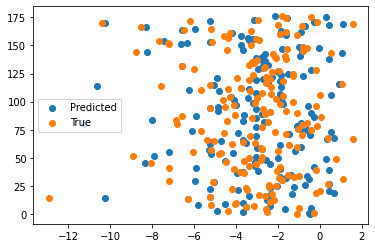


Difference Behavior


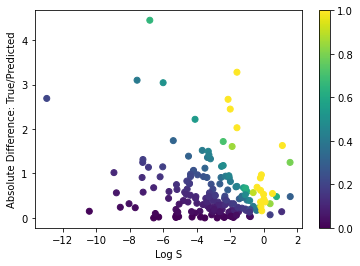

Truth/Prediction Absolute Difference Statistics
Mean: 0.62
Standard Deviation: 0.68
Variance: 0.46


In [13]:
from sklearn.metrics import mean_absolute_error

#Calculate the error on the model and how many data points lie within a selected margin 

Margin = .1

Comparison = pd.DataFrame()

y_pred = model.predict(X_test).reshape(-1)

Comparison['Predicted'] = y_pred
Comparison['True'] = y_test

Comparsion = Comparison.reset_index()

plt.scatter(Comparison['Predicted'],Comparison.index)
plt.scatter(Comparison['True'],Comparison.index)
 
count = 0
total = 0
difference = []
for index,row in Comparison.iterrows():
    pred = row['Predicted']
    true = row['True']
    if true-Margin <= pred <= true+Margin:
        difference.append(abs(pred-true))
        count +=1
        total +=1
    else:
        difference.append(abs(pred-true))
        total +=1
        
print(f'Percentage of Correct Predictions within Margin of {Margin}: {round((count/total)*100,2)}%')
print(f'Model MAE {round(mean_absolute_error(y_test, y_pred),2)}')
plt.legend(['Predicted','True'])
plt.show() 

print()
print('Difference Behavior')

Comparison['Abs_Difference'] = difference

percentage = []
for i in range(len(y_test)):
    if abs(difference[i]) < abs(y_test[i]):
        ratio = abs(difference[i]) / abs(y_test[i])
        percentage.append(ratio[0])
    else:
        percentage.append(1.0)
    
Comparison['Percentage'] = percentage

plt.scatter(Comparison['True'],Comparison['Abs_Difference'], c=Comparison['Percentage'])
plt.xlabel('Log S')
plt.ylabel('Absolute Difference: True/Predicted')
plt.colorbar()
plt.show()



abs_mean = round(np.mean(difference),2)
abs_std = round(np.std(difference),2)
abs_var = round(np.var(difference),2)

print("Truth/Prediction Absolute Difference Statistics")
print(f"Mean: {abs_mean}")
print(f"Standard Deviation: {abs_std}")
print(f"Variance: {abs_var}")

# Colour bar shows the severity of the error, 

# = absolute difference between true and pred over the true
# value itself


In [14]:
#R^2 regresssion score for the Training model
model.score(X_train, y_train)

1.0

In [15]:
#R^2 regresssion score for the Testing model
model.score(X_test, y_test)

0.8413931201723627

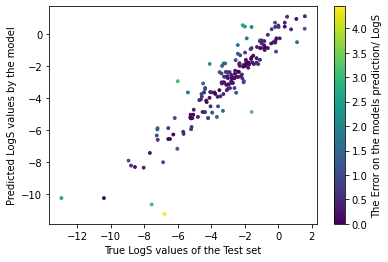

In [16]:
#Plot a scatter graph to show the effectiveness of the model 

plt.scatter(y=y_pred,x=y_test,c=Comparison['Abs_Difference'],  s =8)
plt.xlabel("True LogS values of the Test set")
plt.ylabel("Predicted LogS values by the model")

cbar=plt.colorbar()
cbar.set_label('The Error on the models prediction/ LogS')